In [23]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

In [26]:
batch_size = 128
num_classes = 36
epochs = 12

img_rows, img_cols = 64, 64

In [35]:
x_all = np.load("./x.npy")
y_all = np.load("./y.npy")

x_train = x_all[:8000, :, :]
y_train = y_all[:8000, :, :]

x_test = x_all[8000:, :, :]
y_test = y_all[8000:, :, :]

In [37]:
y_train = y_train.reshape(y_train.shape[0],num_classes)
y_test = y_test.reshape(y_test.shape[0],num_classes)

In [38]:
K.image_data_format()

'channels_last'

In [39]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [40]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [40]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'testing samples')

x_train shape: (8000, 64, 64, 1)
8000 train samples
1659 test samples


In [41]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [42]:
#train that ish!
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
 #how well did it do? 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 8000 samples, validate on 1659 samples
Epoch 1/12
8000/8000 [==============================] - 32s 4ms/step - loss: 12.1685 - acc: 0.0494 - val_loss: 12.1148 - val_acc: 0.0711
Epoch 2/12
8000/8000 [==============================] - 29s 4ms/step - loss: 11.8441 - acc: 0.0823 - val_loss: 11.6662 - val_acc: 0.1055
Epoch 3/12
8000/8000 [==============================] - 29s 4ms/step - loss: 11.3353 - acc: 0.1199 - val_loss: 11.4952 - val_acc: 0.1284
Epoch 4/12
8000/8000 [==============================] - 29s 4ms/step - loss: 10.6204 - acc: 0.1534 - val_loss: 10.1548 - val_acc: 0.1640
Epoch 5/12
8000/8000 [==============================] - 29s 4ms/step - loss: 9.7893 - acc: 0.1910 - val_loss: 9.9463 - val_acc: 0.2001
Epoch 6/12
8000/8000 [==============================] - 29s 4ms/step - loss: 9.0458 - acc: 0.2235 - val_loss: 9.2703 - val_acc: 0.2182
Epoch 7/12
8000/8000 [==============================] - 30s 4ms/step - loss: 8.4184 - acc: 0.2495 - val_loss: 9.1275 - val_acc: 0.2266

In [89]:
from matplotlib import pyplot as plt
from scipy import misc
from scipy import ndimage

In [77]:
sol_sz = (6,6)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:13: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


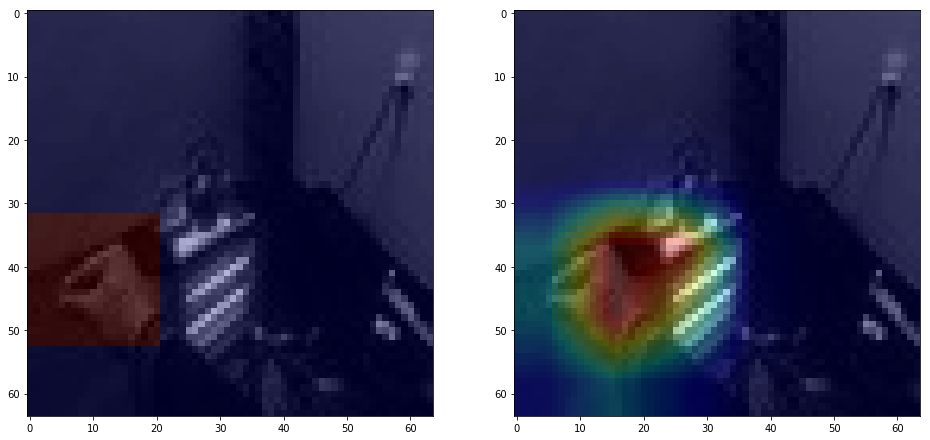

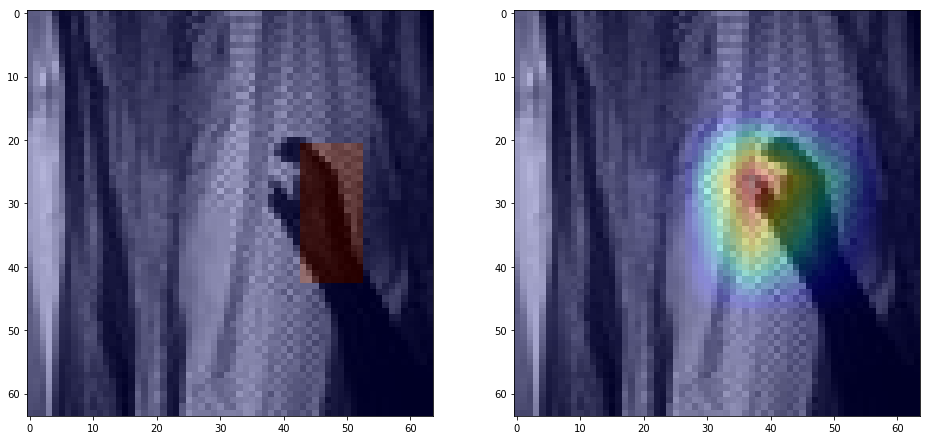

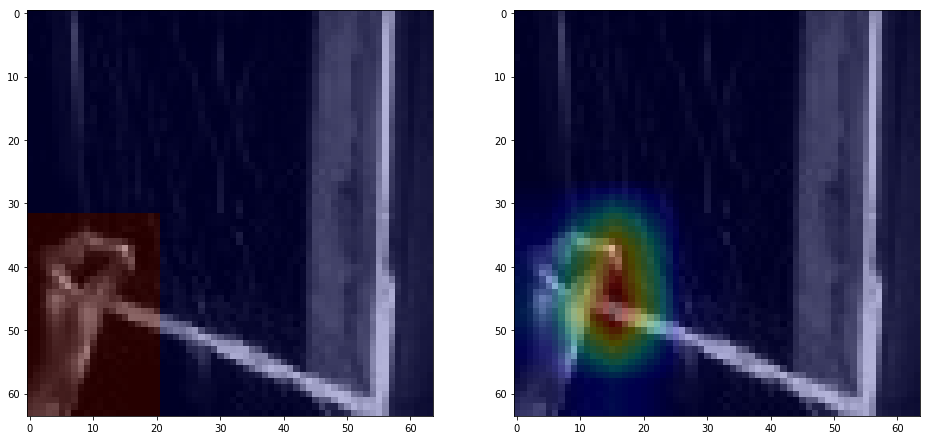

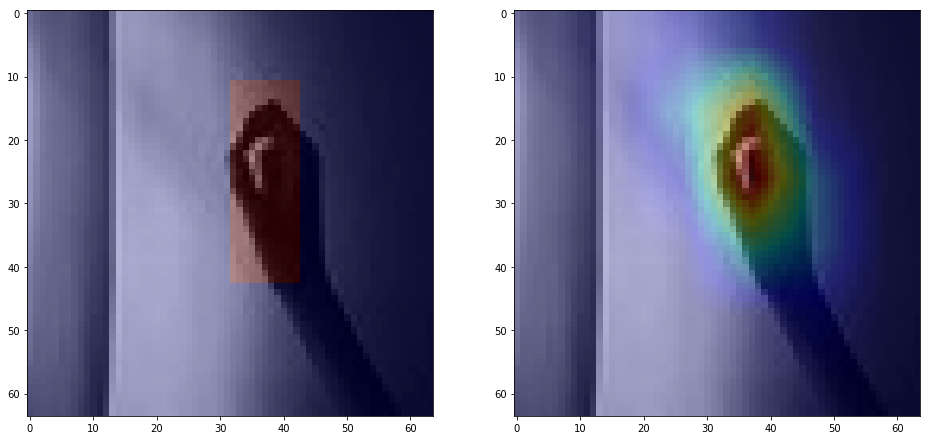

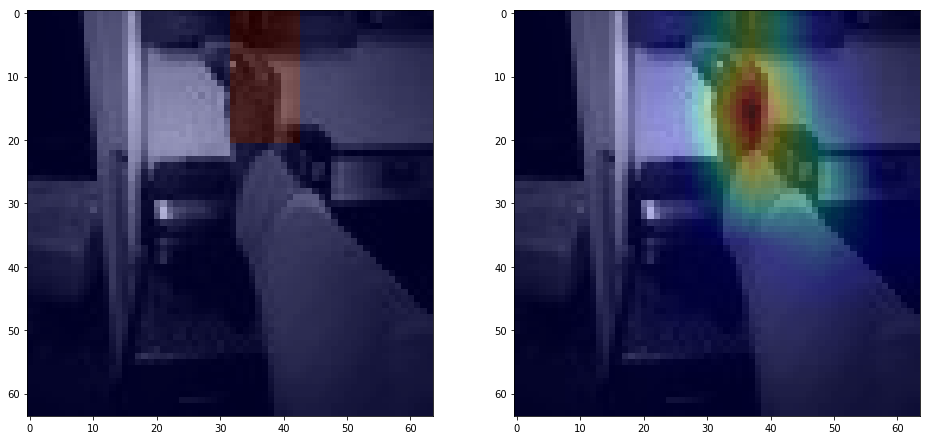

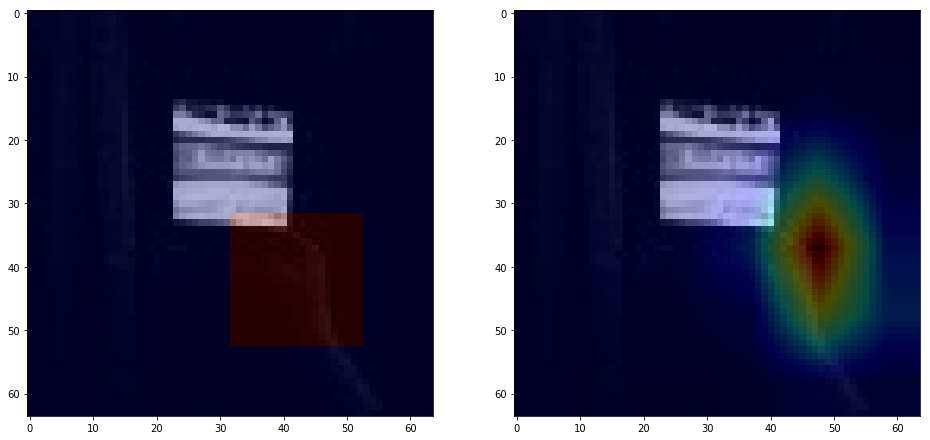

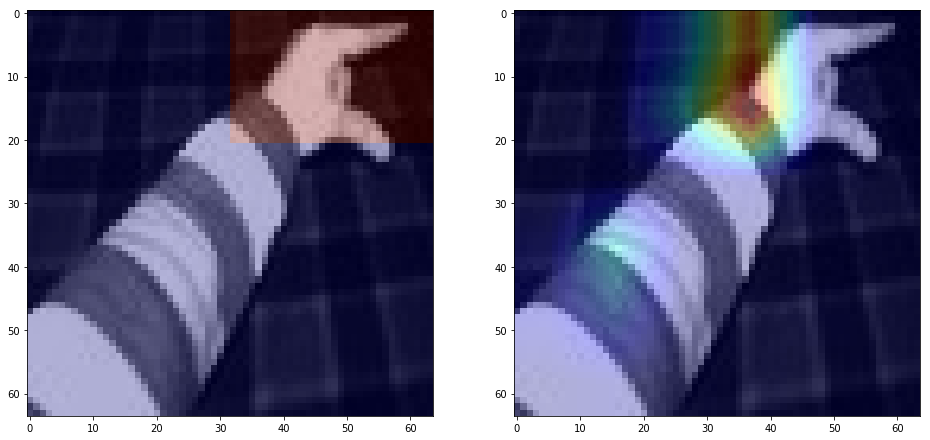

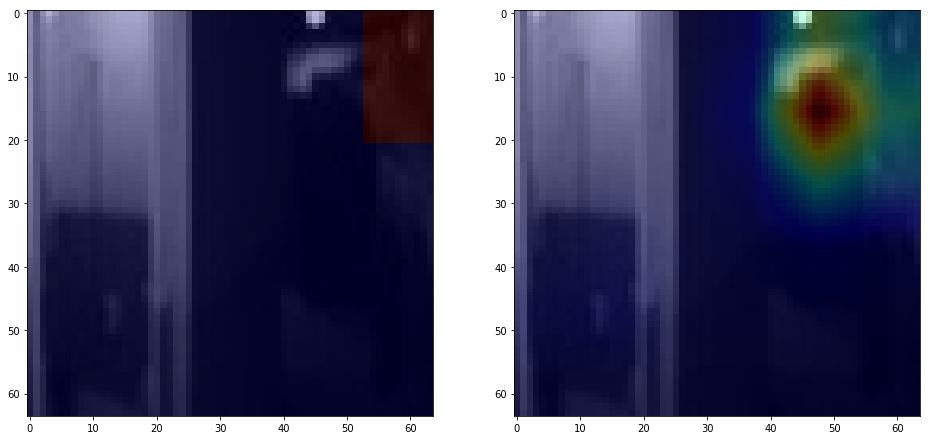

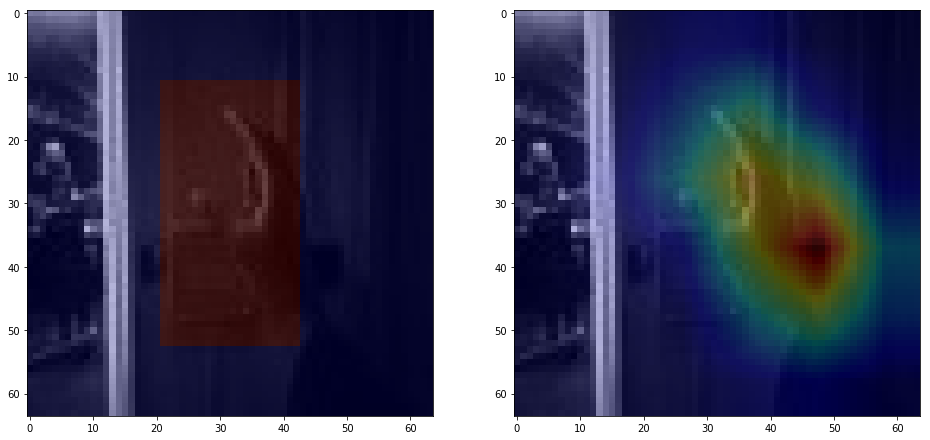

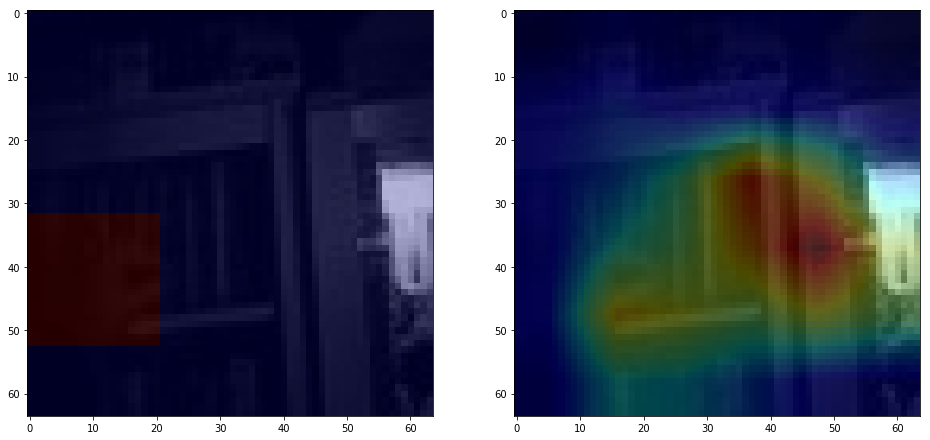

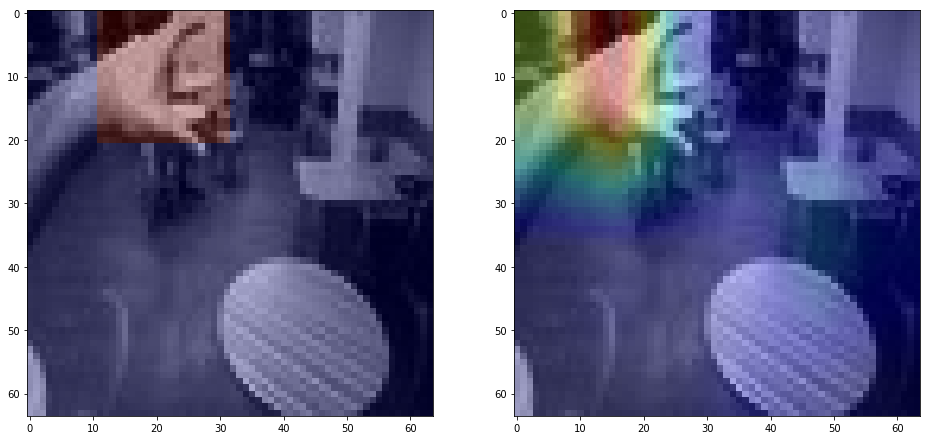

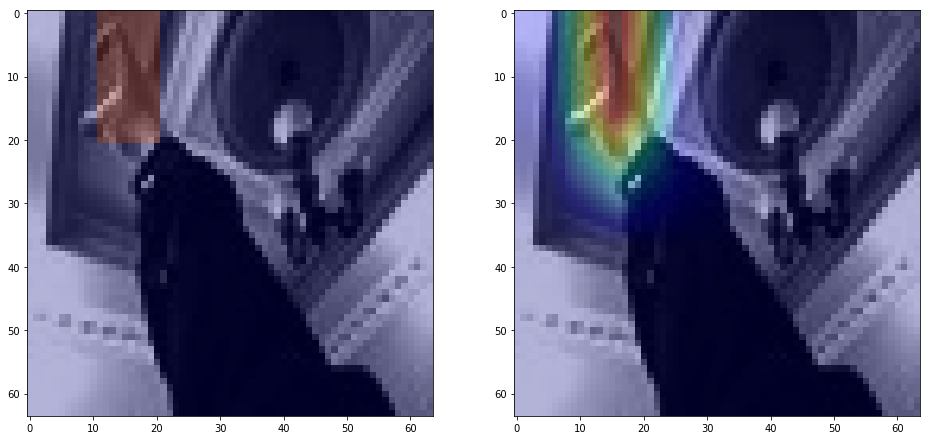

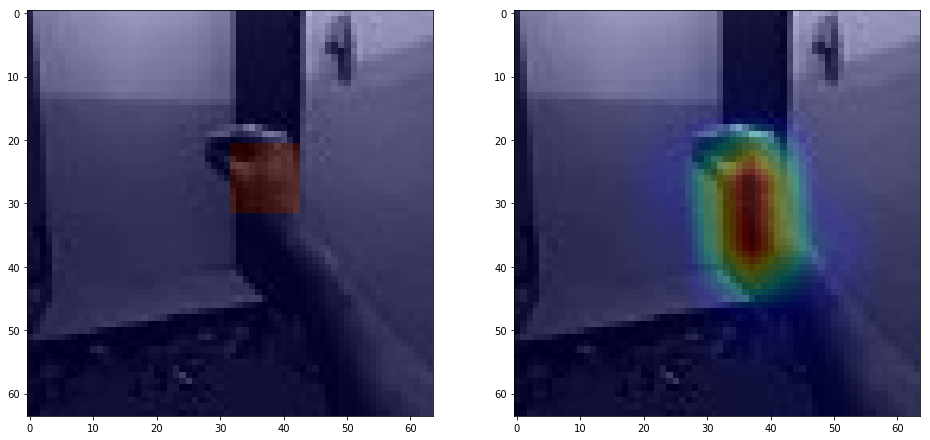

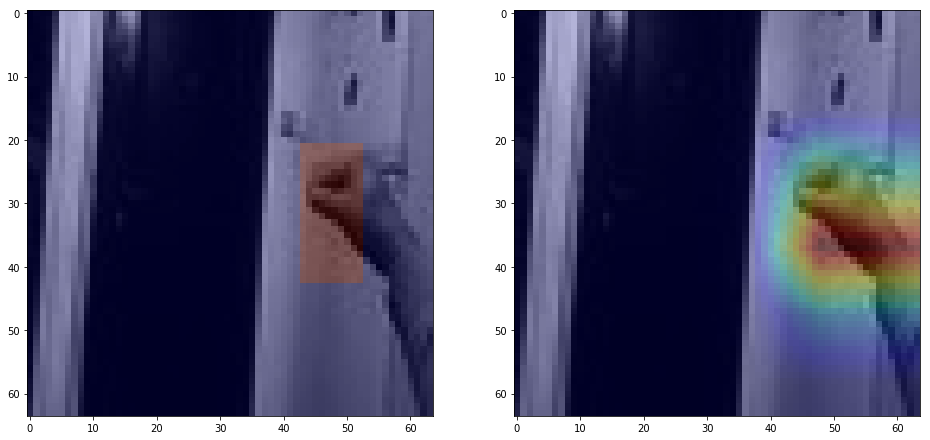

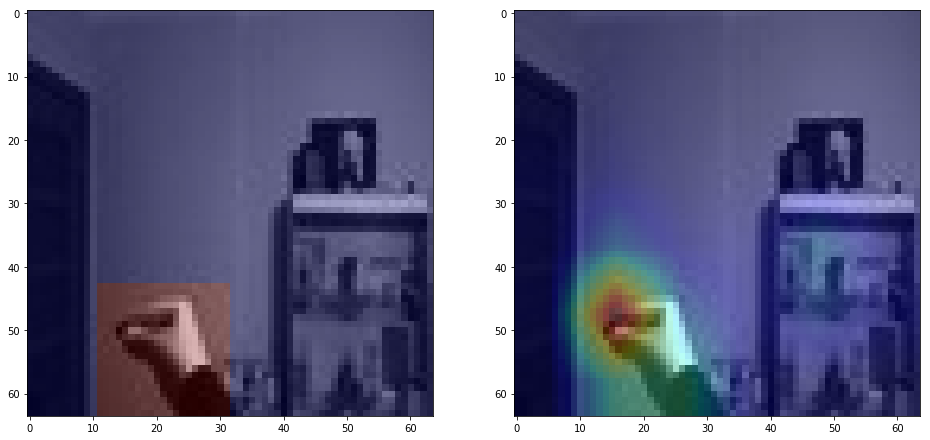

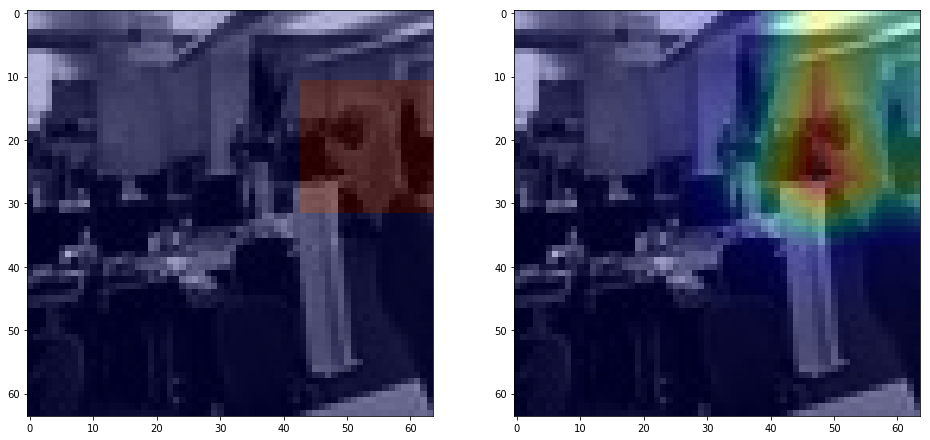

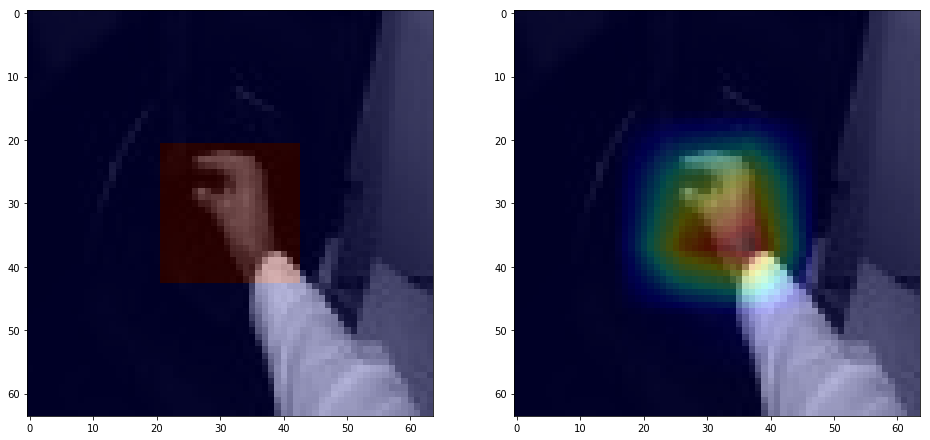

In [91]:
for ex in range(0, x_test.shape[0], 100):
    
    fig,ax = plt.subplots(1,2, figsize=(16,8))
    
    actual_ex = y_test[ex].reshape(sol_sz)
    actual_resized = misc.imresize(actual_ex, (64,64), interp="nearest")
    
    ax[0].imshow(x_test[ex].reshape((64,64)), cmap="gray")
    ax[0].imshow(actual_resized, cmap="jet", alpha=0.3)
#     plt.show()
    
    prediction_ex = model.predict(x_test[ex:ex+1]).reshape(sol_sz)
    pred_resized = misc.imresize(prediction_ex, (64,64))
    
    ax[1].imshow(x_test[ex].reshape((64,64)), cmap="gray")
    ax[1].imshow(pred_resized, cmap="jet", alpha=0.3)
    
#     plt.show()
    fig.show()

In [92]:
# Save the model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
